# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

In [4]:
#imports
import math
import random
import timeit
import matplotlib.pyplot as plt 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [17]:
import math
def orientation(p1, p2, p3): # Cross product of the vectors p1p2 and p2p3. 
    return (p3[1]-p2[1])*(p2[0]-p1[0]) - (p2[1]-p1[1])*(p3[0]-p2[0])

def dist(p1, p2): #Distance between two points
    return (p2[1] - p1[1])**2 + (p2[0] - p1[0])**2

def findLeftmostPoint(inputSet):
   leftmostPoint = inputSet[0]  
   for i in range(len(inputSet)):
       if inputSet[i][1] < leftmostPoint[1] or (inputSet[i][1] == leftmostPoint[1] and inputSet[i][0] < leftmostPoint[0]):
          leftmostPoint = inputSet[i]
   return leftmostPoint

def jarvismarch(inputSet):
    left = findLeftmostPoint(inputSet)
    onHull = left
    outputSet = []
    nextPoint = None
    while nextPoint !=left:
        outputSet.append(onHull)
        nextPoint = inputSet[0] 
        for point in inputSet:
            o = orientation(onHull, nextPoint, point) 
            if nextPoint == onHull or o > 0 or (o == 0 and dist(onHull, point) > dist(onHull, nextPoint)):
                nextPoint = point
        onHull = nextPoint
    return outputSet

import random
import timeit
examplePoints =  [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(200000)]
execution_time = timeit.timeit(lambda: jarvismarch(examplePoints), number=1)
print(f"Execution time: {execution_time:.6f} seconds")


Execution time: 0.773654 seconds


Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [18]:
# Graham Scan
import math

def bubbleSort(numbers):
    for i in range(len(numbers)):
        onePass = False
        for j in range(len(numbers)-1):
            if (numbers[j][1] > numbers[j+1][1]):
                numbers[j], numbers[j+1] = numbers[j+1], numbers[j]
                onePass = True
        if (onePass == False):
            break
    return numbers

def heapify(heap, nodeIndex, leaf):
    largestIndex = nodeIndex
    leftChild = 2*nodeIndex
    rightChild = 2*nodeIndex + 1

    if leftChild <= leaf and heap[leftChild][1] > heap[largestIndex][1]:
        largestIndex = leftChild
    if rightChild <= leaf and heap[rightChild][1] > heap[largestIndex][1]:
        largestIndex = rightChild

    # If a node violates the parent-child relationship, sink with the more violating child 
    if largestIndex != nodeIndex:
        heap[nodeIndex], heap[largestIndex] = heap[largestIndex], heap[nodeIndex]
        heapify(heap, largestIndex, leaf)
    



def heapSort(numbers):
    # child is 2i and 2i+1
    # parent is i // 2 
    # keep track of last node in the tree?
    # 1.) Create a max-heap ordered array
    # 2.) Repeatedly remove the maximum key
    # - process nodes bottom to top ignore leaves
    
    # Start in arbitrary order (given order in this case)
    # Indexing starts from 1, so put arbtirary number in index 0    

    # Keep track of endLeaf (the last node in the tree)
    endLeaf = len(numbers)

    numbers = [((0,0),0,0)] + numbers
    # Process nodes from bottom to top (ignoring child-less nodes)
    # Creating max-heap
    for i in range(endLeaf // 2, 0, -1):
        heapify(numbers, i, endLeaf)
    
    # Remove the maximum key    
    for i in range(endLeaf, 0, -1):
        numbers[i], numbers[1] = numbers[1], numbers[i]
        heapify(numbers, 1, i-1)

    return numbers[1:]

# Worst case of O(nLog(n))
# Average case same
# Best case same
def mergeSort(numbers):
    if (len(numbers) > 1):
        return merge(mergeSort(numbers[:len(numbers)//2]),mergeSort(numbers[len(numbers)//2:]))
    else:
        return numbers
def merge(arr1, arr2):
    new_arr = []
    i = 0
    j = 0
    while i < len(arr1) and j < len(arr2):
        if arr1[i][1] < arr2[j][1] or (arr1[i][1] == arr2[j][1] and arr1[i][2] < arr2[j][2]):
            new_arr.append(arr1[i])
            i += 1
        else:
            new_arr.append(arr2[j])
            j += 1

    if i < len(arr1):
        new_arr.extend(arr1[i:])
    elif j < len(arr2):
        new_arr.extend(arr2[j:])
    return new_arr

def findLowestPoint(inputSet):
   lowestPoint = inputSet[0]  
   lowestIndex = 0
   for i in range(len(inputSet)):
      # Choose lowest y, break ties by choosing lowest x
      if inputSet[i][1] < lowestPoint[1] or (inputSet[i][1] == lowestPoint[1] and inputSet[i][0] < lowestPoint[0]):
         lowestPoint = inputSet[i]
         lowestIndex = i
 
   return lowestIndex, lowestPoint

def turnMade(point1, point2, point3):
    """Parameters:
    point1, point2, point3 (tuple): The points as tuples of x and y coordinates.

    Returns:
    float: The cross product of the vectors formed by point1-point2 and point1-point3.

    Determine the relative direction of the turn made by three points.

    The function calculates the cross product of the vectors formed by point1-point2 and point1-point3. 
    The sign of the result indicates the direction of the turn:
    - If the result is positive, the direction is counter-clockwise.
    - If the result is negative, the direction is clockwise.
    - If the result is zero, the points are collinear."""
   
    return (point2[0] - point1[0]) * (point3[1]-point1[1]) - (point2[1]-point1[1]) * (point3[0] - point1[0])

def distance(point1, point2):
    """Parameters:
    point1 (tuple): The first point as a tuple of x and y coordinates.
    point2 (tuple): The second point as a tuple of x and y coordinates.

    Returns:
    float: The Euclidean distance between the two points.

    Calculate the Euclidean distance between two points."""
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def polarAngle(point1, point2):
    """Parameters:
    point1 (tuple): The origin point as a tuple of x and y coordinates.
    point2 (tuple): The second point as a tuple of x and y coordinates.

    Returns:
    float: The polar angle in radians.

    Calculate the polar angle between two points.

    The polar angle is the counterclockwise angle in radians from the x-axis 
    to the vector pointing from the origin to the point. In this case, the origin 
    is `point1` and the point is `point2`."""

    return math.atan2((point2[1] - point1[1]), (point2[0] - point1[0]))


def grahamscan(inputSet, sortingAlgorithmToUse):
    
    """Perform the Graham scan algorithm to find the convex hull of a set of points.
    - NOTE: You can choose the sorting algorithm to use: "python" for python sort, "merge" for mergesort
    1.) The function first finds the point with the lowest y-coordinate, breaks ties by going for lowest x-coordinate 

    2.) It swaps it with the first item in the inputSet

    3.) The function then sorts the remaining points based on their polar angle 
    with the lowest point, breaking ties by distance from the lowest point. 

    4.) The sorted points are then processed from beginning to end. 
    5.) For each point, while there is a right turn (clockwise direction) made by the path (considering the 3 most recent points)
        6.) the last point is removed from the convex hull
        7.) Else: The current point is then added to the convex hull.

    Parameters:
    inputSet (list): A list of 2D points as tuples of x and y coordinates.

    Returns:
    outputSet (list): A list of 2D points that lie on the convex hull."""
    # 1 2
    lowestIndex, lowestPoint = findLowestPoint(inputSet) 

    inputSet[0] , inputSet[lowestIndex] = inputSet[lowestIndex] , inputSet[0]

    # 3
    if sortingAlgorithmToUse == "python":
        sortedPoints = sorted(inputSet[1:], key=lambda point: polarAngle(lowestPoint, point))
    else:
        sortedPointsWithAngles = [(point, polarAngle(lowestPoint, point), distance(lowestPoint, point)) for point in inputSet[1:]]
      
        if sortingAlgorithmToUse == "merge": # Merge    
            sortedPoints = mergeSort(sortedPointsWithAngles)
        elif sortingAlgorithmToUse == "heap":
            sortedPoints = heapSort(sortedPointsWithAngles)
        elif sortingAlgorithmToUse == "bubble":
            sortedPoints = bubbleSort(sortedPointsWithAngles)
   
        sortedPoints = [point for point, angle, distance in sortedPoints]
    
    convexHull = []

    # LowestPoint
    convexHull.append(inputSet[0])
    # First connection to lowestPoint
    convexHull.append(sortedPoints[0])

    i = 2
    previousAngleWasColinear = False
    # 4
    while i < len(sortedPoints):
        lastPoint = convexHull[-1]
        lastPointBefore = convexHull[-2]
        pointConsidered = sortedPoints[i]

        turnDirection = turnMade(lastPointBefore, lastPoint, pointConsidered)
        # Counter-Clockwise of the most recent three points, so add to the hull
        # 7
        if (turnDirection > 0):
            convexHull.append(pointConsidered)
            previousAngleWasColinear = False
            i += 1
        # 5 6 
        # Clockwise of the most recent three points, so pop from the hull
        elif len(convexHull) > 2 and turnDirection < 0:
            convexHull.pop()
            previousAngleWasColinear = False
        elif (turnDirection == 0):
            # If we're in a sequence of colinear points, pop the previous node because we've found another colinear point
            # Or edge case: where the third point (2nd index) in sortedPoints started a colinear sequence, so the second point (1st index) should be discarded
            if previousAngleWasColinear == True or i == 2:
                convexHull.pop()

            convexHull.append(pointConsidered)
            previousAngleWasColinear = True
            i += 1
        else:
            i+=1
                    
            
    outputSet = convexHull
    return outputSet


#print(grahamscan(inputSet))
############################################################################

import random
import timeit

resolution = 200_00



# print("Final: pythonsort: ",  grahamscan([(0,3), (4,4),(1,1), (0,0), (1,2), (3,1), (3,3), (2,2)], "python"))
print("mergesort: ", grahamscan([(0,3), (1,1), (4,4), (2,2), (0,0), (1,2), (3,1), (3,3)], "merge"))
# print("Final: bubblesort: ", grahamscan([(0,3), (1,1), (2,2), (4,4), (0,0), (1,2), (3,1), (3,3)], "bubble"))
# print("Final: heapsort: ",grahamscan([(0,3), (1,1), (2,2), (4,4), (0,0), (1,2), (3,1), (3,3)], "heap"))


# Input is average case (random points)
inputSet = [(random.uniform(0, 1000), random.uniform(0, 1000)) for _ in range(resolution)]
"""
### Input is the same line
slope = 3#random.uniform(-10, 10)
intercept = 0#random.uniform(-10, 10)
# Generate 100000 collinear points along the line
inputSet = [(x, slope * x + intercept) for x in range(resolution)]
print(inputSet)

### Input is a circle
# Choose a center and a radius for the circle
center = (random.uniform(-10, 10), random.uniform(-10, 10))
radius = random.uniform(1, 10)
# Generate 1000 points along the circumference of the circle
inputSet = [(center[0] + radius * math.cos(2 * math.pi * i / 1000), center[1] + radius * math.sin(2 * math.pi * i / 1000)) for i in range(1000)]

### Input is a Triangle
# Choose three vertices for the triangle
vertices = [(0, 0), (1, 0), (0.5, math.sqrt(3)/2)]
# Generate points along the edges of the triangle
inputSet = []
# Edge from vertices[0] to vertices[1]
for t in range(resolution):
    x = vertices[0][0] + t * (vertices[1][0] - vertices[0][0]) / resolution
    y = vertices[0][1] + t * (vertices[1][1] - vertices[0][1]) / resolution
    inputSet.append((x, y))
# Edge from vertices[1] to vertices[2]
for t in range(resolution):
    x = vertices[1][0] + t * (vertices[2][0] - vertices[1][0]) / resolution
    y = vertices[1][1] + t * (vertices[2][1] - vertices[1][1]) / resolution
    inputSet.append((x, y))
# Edge from vertices[2] to vertices[0]
for t in range(resolution):
    x = vertices[2][0] + t * (vertices[0][0] - vertices[2][0]) / resolution
    y = vertices[2][1] + t * (vertices[0][1] - vertices[2][1]) / resolution
    inputSet.append((x, y))
"""

# Wrap function call in a timeit statement
# execution_time = timeit.timeit(lambda: grahamscan(inputSet, "python"), number=1)

# print(f"Execution time with Python Sort: {execution_time:.6f} seconds")

# execution_time = timeit.timeit(lambda: grahamscan(inputSet, "merge"), number=1)

# print(f"Execution time with Merge Sort: {execution_time:.6f} seconds")




mergesort:  [(0, 0), (3, 1), (4, 4), (0, 3)]


'\n### Input is the same line\nslope = 3#random.uniform(-10, 10)\nintercept = 0#random.uniform(-10, 10)\n# Generate 100000 collinear points along the line\ninputSet = [(x, slope * x + intercept) for x in range(resolution)]\nprint(inputSet)\n\n### Input is a circle\n# Choose a center and a radius for the circle\ncenter = (random.uniform(-10, 10), random.uniform(-10, 10))\nradius = random.uniform(1, 10)\n# Generate 1000 points along the circumference of the circle\ninputSet = [(center[0] + radius * math.cos(2 * math.pi * i / 1000), center[1] + radius * math.sin(2 * math.pi * i / 1000)) for i in range(1000)]\n\n### Input is a Triangle\n# Choose three vertices for the triangle\nvertices = [(0, 0), (1, 0), (0.5, math.sqrt(3)/2)]\n# Generate points along the edges of the triangle\ninputSet = []\n# Edge from vertices[0] to vertices[1]\nfor t in range(resolution):\n    x = vertices[0][0] + t * (vertices[1][0] - vertices[0][0]) / resolution\n    y = vertices[0][1] + t * (vertices[1][1] - vertic

Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [19]:


def divideSet(lst, m):
    return [lst[i:i + m] for i in range(0, len(lst), m)]

def jarvismarch4Chan(inputSet, m):
    left = findLeftmostPoint(inputSet)
    onHull = left
    outputSet = []
    nextPoint = None
    i = 0
    while nextPoint !=left:
        if i > m**2:
            return None
        outputSet.append(onHull)
        nextPoint = inputSet[0] 
        for point in inputSet:
            o = orientation(onHull, nextPoint, point) 
            if nextPoint == onHull or o > 0 or (o == 0 and dist(onHull, point) > dist(onHull, nextPoint)):
                nextPoint = point
        onHull = nextPoint
    return outputSet

def chan(inputSet):
    n = len(inputSet)
    m = 2
    while m < n:
        print(m)
        partitions = divideSet(inputSet, m)#1
        hulls = []
        for p in partitions:
            hulls += grahamscan(p, "merge")
        
        out = jarvismarch4Chan(hulls, m)
        if out is not None:
            return out
        m = m**2
    raise Exception("No hull found")

inputSet = [(0,3), (1,1), (4,4), (2,2), (0,0), (1,2), (3,1), (3,3)]
print(chan(inputSet))

2
[(0, 0), (0, 3), (4, 4), (3, 1)]


Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [20]:
class TestDataGenerator():
    """
    A class to represent a synthetic data generator.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__():
        pass


Use the cell below to implement the requested **experimental framework** API.

In [21]:

class ExperimentalFramework():
    """
    A class to represent an experimental framework.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__():
        pass

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

graham with 4000 points


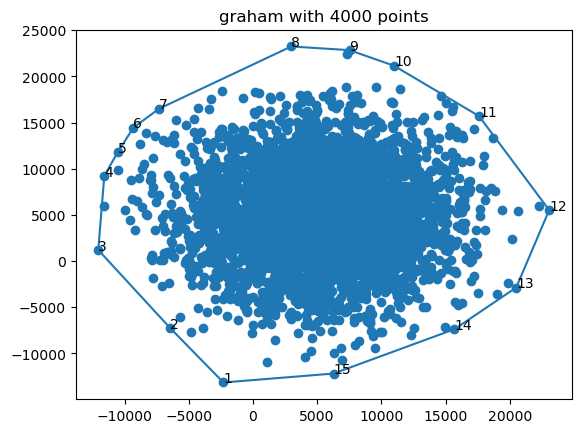

In [22]:
# ADD YOUR TEST CODE HERE 





#PLOTTING
import matplotlib.pyplot as plt

def graph(inSet, outSet, title=""):
    plt.title(title)
    x = []
    y = []
    for i in inSet:
        x.append(i[0])
        y.append(i[1])
    plt.scatter(x, y)
    x = []
    y = []
    for i in outSet:
        x.append(i[0])
        y.append(i[1])
    x.append(outSet[0][0])
    y.append(outSet[0][1])    
    plt.plot(x, y)
    for i in range(len(outSet)):
        plt.text(x[i], y[i], f"{i+1}")   
    plt.show()


resolution = 4_000 # u can change this number

inputSet = []
for _ in range(resolution):
    x = random.gauss(5_000, 5_000)
    y= random.gauss(5_000, 5_000)
    inputSet.append((x,y))


title = f"graham with {resolution} points" # u can change the title
print(title)
hull = jarvismarch(inputSet) # u can change the algo

graph(inputSet, hull, title)